### <b> Lane-Emden (numerical) solutions for a given n </b>

#### <b> 1. Lane-Emden equation: (ξ = xi, θ = theta) </b>

* $ 1/ξ^2 * d/dξ(ξ^2 * dθ/dξ) + θ^n $ <b> (eq. 1) </b> 

By expanding the derivative term $ 1/ξ^2 * d/dξ(ξ^2 * dθ/dξ) $:

*  $ 1/ξ^2(2ξ * dθ/dξ + ξ^2 * d^2θ/dξ^2) =$ 
    * $ = 2/ξ * dθ/dξ + d^2θ/dξ^2 $ <b> (eq. 2) </b>

#### <b> 2. Inserting the expanded derivative into the first equation </b>
Inserting the expanded derivative <b> (eq.2) </b> back into the first equation <b>(eq.1)</b>, we get a second order differential equation $ θ(ξ)$:

* <b> $ d^2θ/dξ^2 + 2/ξ* dθ/dξ + θ^n = 0$ </b>

#### <b> 3. Turning the Second ODE into a First ODE </b>

We can define a new variable for the first derivative of theta $(dθ/dξ)$ as follows:

* $y1(ξ) = θ $
* $ y2(ξ) = dθ/dξ = dy1/dξ $

And as such, the second derivative of theta can be expressed as a first order derivative:
* $dy2/dξ = d^2θ/dξ^2 $



#### <b> 4. Rewriting he Lane-Emden equation </b>

Substituting $y1$ and $y2$ into the Lane-Emden equation, we get:

* $dy2/ξ+ 2/ξ*y2 + y1^n = 0$

#### <b> 5. First Order System and Initial Conditions </b>

After substituting $y1$ and $y2$ into the original Lane-Emden equations, we can now formulate a Fist Order Differential Equations System (instead of a Second Order one), and solve it numerically using the initial conditions as expressed below:

* System:
    * $ dy1/dξ = y2 $
    * $ dy2/dξ = -2/ξ * y2 - y1^n $

* Initial Conditions:
    * $ θ(ξ = 0) = y1(0) = 1 $
    * $ dθ(ξ = 0)/dξ = y2(0) = 0 $

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [ ]:
# First ODE system
def lane_emden_sys(xi, S, n):
    y1, y2 = S
    dy1_dxi = y2
    dy2_dxi = -2*y2/xi - np.abs(y1)**n

    return [dy1_dxi, dy2_dxi]

def lane_emden_solver(n):


    # xi Range
    xi_0 = 1e-7 # prevent numerical singularity
    xi_range = np.linspace(xi_0, 40, 100000)


    # Initial Conditions
    y1_0 = 1-xi_0**2/2           # θ(ξ₀) ≈ 1 - ξ₀²/2
    y2_0 = -xi_0                        # dθ/dξ(ξ₀) ≈ -ξ₀
    lane_em_0 = [y1_0, y2_0]

    # Solve Lane-Emden system
    sol = odeint(lane_emden_sys, lane_em_0, xi_range, args=(n,), tfirst=True)
    
    x = np.append([0], xi_range)
    y1 = np.append([1], sol[:, 0])
    y2 = np.append([0], sol[:, 1])

    zero_index = 1 + int(np.argwhere(y1<0)[0])

    x = x[:zero_index]
    y1 = y1[:zero_index]
    y2 = y2[:zero_index]

    
    
    dec1 = (y1[-2] - y1[-1])/(x[-2]-x[-1])
    root = -(y1[-2] - dec1*x[-2])/dec1
    dec2 = (y2[-1] - y2[-2])/(x[-1] - x[-2])
    ponto_sup = y2[-2]-dec2*x[-2]+dec2*x[-1]
    x[-1] = root
    y1[-1] = 0
    y2[-1] = ponto_sup
    """
    # Interpolação linear para encontrar o ponto onde y1 = 0
    interp_func_y1 = interp1d(y1[-2:], x[-2:], kind='linear')
    root = interp_func_y1(0)  # O valor de x onde y1 cruza zero

    # Atualizar x e y1 com o ponto onde y1 = 0
    x[-1] = root
    y1[-1] = 0

    # Para y2, fazer uma interpolação semelhante para obter o valor correspondente de y2
    interp_func_y2 = interp1d(x[-2:], y2[-2:], kind='linear')
    y2[-1] = interp_func_y2(root)  # Obter o valor interpolado de y2 no novo ponto x
    """
    print("xi_s (relative radius): ", x[-1])
    print("Density at the root is : ", y1[-1])
    print("Derivative of the density at xi_s is: ", y2[-1])
    print('\n')

    return x, y1, y2

In [39]:
def lane_emden_plots():
    # List of n values
    ns = [0,1, 1.5, 3, 4, 4.5]

    # Lane-Emden solution for different values of n
    for n in ns:
        xi_range, y1, y2 = lane_emden_solver(n)
        plt.plot(xi_range, y1, label=f"n = {n}")
        plt.ylim(0,1)
        plt.xlim(0,15)
        plt.xlabel(r'$\xi$')
        plt.ylabel(r'$\theta(\xi)$')
        plt.title('Lane-Emden Solutions for different values of n')
        plt.legend()
        plt.grid(True)
    plt.show()

    # xi_s for different values of n
    for n in ns:
        xi_range, y1, y2 = lane_emden_solver(n)
        xs = xi_range/xi_range[-1]
        plt.plot(xs, y1, label=f"n = {n}")
        plt.ylim(0,1)
        plt.xlim(0,1)
        plt.xlabel(r'$\xi$/$\xi_S$')
        plt.ylabel(r'$\theta$')
        plt.title(r'$\xi_S$ for different values of n')
        plt.legend()
        plt.grid(True)
    plt.show()

xi_s (relative radius):  2.449489683761797
Density at the root is :  0.0
Derivative of the density at xi_s is:  -0.8165415300631689


xi_s (relative radius):  3.1415927280146145
Density at the root is :  0.0
Derivative of the density at xi_s is:  -0.3183020430374863


xi_s (relative radius):  3.653753478798119
Density at the root is :  0.0
Derivative of the density at xi_s is:  -0.2032698847505606


xi_s (relative radius):  6.896849270733549
Density at the root is :  0.0
Derivative of the density at xi_s is:  -0.04242949847355305


xi_s (relative radius):  14.971553076204449
Density at the root is :  0.0
Derivative of the density at xi_s is:  -0.00801785695268787


xi_s (relative radius):  31.83642844807129
Density at the root is :  0.0
Derivative of the density at xi_s is:  -0.0017145290047898298




/var/folders/vw/fb5g0yw578jfpvmgdl2bgkr80000gn/T/ipykernel_13496/2166290810.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  zero_index = 1 + int(np.argwhere(y1<0)[0])
/var/folders/vw/fb5g0yw578jfpvmgdl2bgkr80000gn/T/ipykernel_13496/2166290810.py:23: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sol = odeint(lane_emden_sys, lane_em_0, xi_range, args=(n,), tfirst=True)


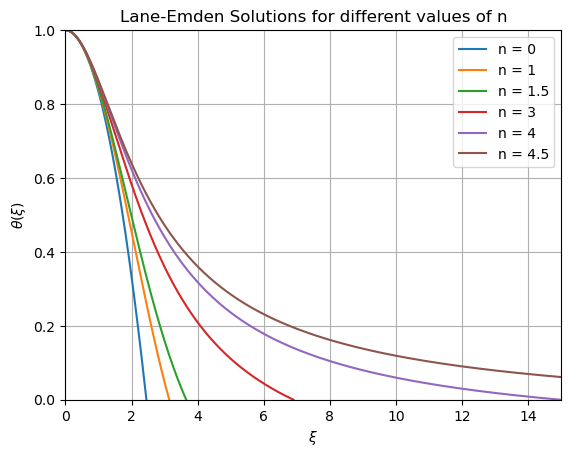

xi_s (relative radius):  2.449489683761797
Density at the root is :  0.0
Derivative of the density at xi_s is:  -0.8165415300631689


xi_s (relative radius):  3.1415927280146145
Density at the root is :  0.0
Derivative of the density at xi_s is:  -0.3183020430374863


xi_s (relative radius):  3.653753478798119
Density at the root is :  0.0
Derivative of the density at xi_s is:  -0.2032698847505606


xi_s (relative radius):  6.896849270733549
Density at the root is :  0.0
Derivative of the density at xi_s is:  -0.04242949847355305


xi_s (relative radius):  14.971553076204449
Density at the root is :  0.0
Derivative of the density at xi_s is:  -0.00801785695268787


xi_s (relative radius):  31.83642844807129
Density at the root is :  0.0
Derivative of the density at xi_s is:  -0.0017145290047898298




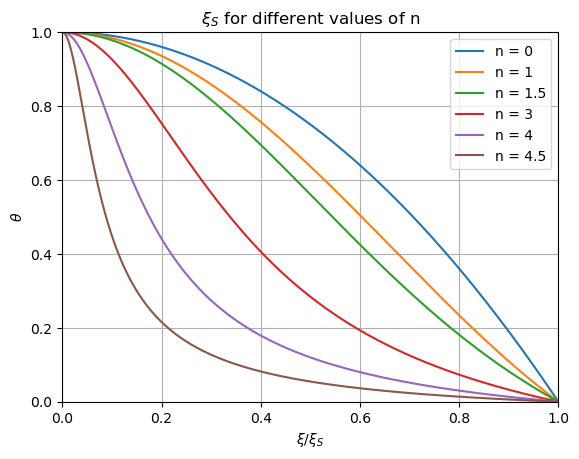

In [40]:
lane_emden_plots()